In [7]:
import pandas as pd
import matplotlib.pyplot as plt

results_folder = 'results_two_peaks'

table = pd.read_csv('../'+results_folder+'/picos_ajustados.csv')
labels_exp = pd.read_excel('../raman_dados/Tabela_Raman.xlsx')


In [12]:
spp = set(labels_exp['Conteúdo analisado'])
print(spp)

{'Leiosphaeridia tenuissima', 'Germinosphaera bispinosa', 'Arctacellularia januarensis', 'Leiosphaeridia minutissima', 'Amorphous organic matter'}


,Unnamed: 0,a1,a2,a3,a4,f1,f2,f3,f4,l1,l2,l3,l4,arquivo
0,0,218.453461,522.018911,239.078006,821.115781,1245,1345.941045,1510,1606.449787,92.825973,52.691240,84.664126,23.459109,A
1,1,184.115886,459.366875,202.152399,729.659095,1245,1345.681092,1510,1606.299421,86.970060,52.854348,89.262023,23.061109,B
2,2,1274.477591,3192.460030,1554.558907,4835.553749,1245,1346.815953,1510,1605.271479,87.195582,54.290827,78.894202,25.318400,C
3,3,0.010804,4568.021572,1739.371213,7423.505811,1245,1330.087538,1510,1603.535924,42.618770,86.939873,47.876768,26.723185,D
4,4,653.020883,1265.557213,899.116446,1865.647209,1245,1351.300673,1510,1607.193310,106.143009,76.298536,66.622952,41.023720,E
5,5,1128.982297,2606.718395,1348.295828,4356.092868,1245,1347.133375,1510,1605.413957,87.355800,55.754869,79.013595,24.425594,F
6,6,950.789316,2475.168078,1189.126978,3547.168079,1245,1348.498217,1510,1606.017438,86.605577,54.495481,75.497628,25.945613,G
7,7,1091.580521,2484.714340,1326.930498,4224.899609,1245,1342.558019,1510,1605.357111,97.167936,51.559501,101.851143,22.725770,H
8,8,722.758802,1121.680946,362.913449,1524.578998,1245,1399.994415,1510,1601.436758,108.113725,84.332793,59.045075,57.223644,I
9,9,688.235309,1266.130929,754.365494,1510.137557,1245,1372.014387,1510,1605.160015,85.054420,74.768126,59.237565,49.081025,J


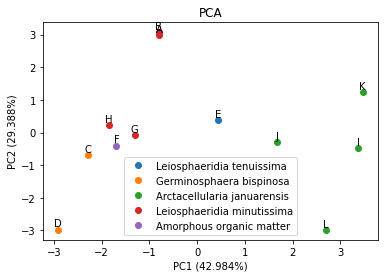

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dd = table.iloc[:,:-1].values
amostras = table.iloc[:,-1].values
X = StandardScaler().fit_transform(dd)
pca = PCA(n_components = 2)
pc = pca.fit_transform(X)
pcvars = pca.explained_variance_ratio_[:2]
fig = plt.figure() 

for l in spp:
    ind = labels_exp['Conteúdo analisado'] == l
    plt.plot(pc[ind,0],pc[ind,1],'o',label=l)

for i in range(pc.shape[0]):
    
    x = pc[i,0]
    y = pc[i,1]

    label = str(amostras[i])

    plt.annotate(label, # this is the text
                    (x,y), # this is the point to label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
plt.xlabel(f'PC1 ({100*pcvars[0]:.3f}%)')        
plt.ylabel(f'PC2 ({100*pcvars[1]:.3f}%)')
plt.title('PCA')
plt.legend()
plt.savefig('../'+results_folder+'/pca_raman.png')

In [4]:
labels_exp

,Nome do arquivo,Amostra,Conteúdo analisado,Observações,Rótulo
0,Denezine_Leiosphaere_MP3710_notburned,MP3710,Leiosphaeridia minutissima,NaN,A
1,Denezine_Leiosphaere_MP3710_notburned_darkarea,MP3710,Leiosphaeridia minutissima,NaN,B
2,MP3714_Gb_claro,MP3714,Germinosphaera bispinosa,NaN,C
3,MP3714_Gb_escuro,MP3714,Germinosphaera bispinosa,NaN,D
4,MP3728_Lt_2nd_notburned,MP3728,Leiosphaeridia tenuissima,NaN,E
5,MP3728_Organic_matrix,MP3728,Amorphous organic matter,NaN,F
6,MP3723_L,MP3723,Leiosphaeridia minutissima,NaN,G
7,MP3728_L_claro,MP3728,Leiosphaeridia minutissima,NaN,H
8,MP3723_Aj,MP3723,Arctacellularia januarensis,NaN,I
9,MP3710_Aj_Holo,MP3710,Arctacellularia januarensis,Holótipo,J
